## Import required packages

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
import os

## Import Dataset

In [4]:
data = pd.read_csv("PCOS_data.csv")

## Data preprocessing

In [6]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [7]:
data = data.drop(['Sl. No','Patient File No.','Unnamed: 44'],axis=1)

In [8]:
data.size

22722

In [9]:
data.shape

(541, 42)

In [10]:
data.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [11]:
data.isnull().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [12]:
data = data.fillna(0)

In [13]:
data.dtypes

PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/

In [14]:
object = ['II    beta-HCG(mIU/mL)','AMH(ng/mL)']
for i in object:
    data[i]=data[i].astype('category')
    data[i]=data[i].cat.codes

## Feature selection using Random Forest

In [16]:
x = data.drop(["PCOS (Y/N)"],axis=1)
y = data["PCOS (Y/N)"]

In [17]:
clf = RandomForestClassifier(random_state=42)
clf.fit(x, y)

RandomForestClassifier(random_state=42)

In [18]:
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [19]:
print("Feature Importances:\n", feature_importances)

Feature Importances:
                    Feature  Importance
37        Follicle No. (R)    0.198700
36        Follicle No. (L)    0.128635
29    Skin darkening (Y/N)    0.060284
28        hair growth(Y/N)    0.051503
27        Weight gain(Y/N)    0.049082
8               Cycle(R/I)    0.028827
16              LH(mIU/mL)    0.026222
17                  FSH/LH    0.024679
32         Fast food (Y/N)    0.024373
9       Cycle length(days)    0.022325
3                      BMI    0.021635
22              AMH(ng/mL)    0.020127
1              Weight (Kg)    0.020098
0                Age (yrs)    0.019634
24          Vit D3 (ng/mL)    0.017410
10   Marraige Status (Yrs)    0.016802
18               Hip(inch)    0.016626
38    Avg. F size (L) (mm)    0.016305
39    Avg. F size (R) (mm)    0.016212
23              PRL(ng/mL)    0.016031
19             Waist(inch)    0.015873
21             TSH (mIU/L)    0.015785
15             FSH(mIU/mL)    0.015028
2              Height(Cm)     0.014107
26 

In [20]:
top_30_features = feature_importances.head(30)['Feature'].tolist()
top_30_features = sorted(top_30_features, key=lambda y: x.columns.get_loc(y))

In [21]:
x_top_30 = x[top_30_features]

In [22]:
x_top_30

,Age (yrs),Weight (Kg),Height(Cm),BMI,Pulse rate(bpm),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),I beta-HCG(mIU/mL),FSH(mIU/mL),...,RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28,44.6,152.000,19.3,78,2,5,7.0,1.99,7.95,...,92.0,0,0,0,1.0,3,3,18.0,18.0,8.5
1,36,65.0,161.500,24.9,74,2,5,11.0,60.80,6.73,...,92.0,0,0,0,0.0,3,5,15.0,14.0,3.7
2,33,68.8,165.000,25.3,72,2,5,10.0,494.08,5.54,...,84.0,0,0,0,1.0,13,15,18.0,20.0,10.0
3,37,65.0,148.000,29.7,72,2,5,4.0,1.99,8.06,...,76.0,0,0,0,0.0,2,2,15.0,14.0,7.5
4,25,52.0,161.000,20.1,72,2,5,1.0,801.45,3.98,...,84.0,0,0,0,0.0,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,35,50.0,164.592,18.5,72,2,5,8.0,1.99,10.06,...,92.0,0,0,0,0.0,1,0,17.5,10.0,6.7
537,30,63.2,158.000,25.3,72,2,5,4.0,80.13,5.07,...,108.0,1,0,0,0.0,9,7,19.0,18.0,8.2
538,36,54.0,152.000,23.4,74,2,6,8.0,1.99,11.96,...,92.0,0,0,0,0.0,1,0,18.0,9.0,7.3
539,27,50.0,150.000,22.2,74,4,2,2.0,292.92,4.40,...,115.0,0,0,0,0.0,7,6,18.0,16.0,11.5


## Split Train and Test Data

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x_top_30,y,test_size=0.25,stratify=y)

## Initializing XGBoostClassifier using GridsearchCV

In [26]:
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [27]:
xgb = XGBClassifier(n_estimators=200, objective='binary:logistic', learning_rate=0.1)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Testing the model

In [29]:
y_pred = xgb.predict(x_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 86.03%


## Create Classification Report

In [32]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        92
           1       0.76      0.84      0.80        44

    accuracy                           0.86       136
   macro avg       0.84      0.86      0.84       136
weighted avg       0.87      0.86      0.86       136



In [33]:
# Calculate and print precision and recall
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.76
Recall: 0.84


## Create Confusion Matrix

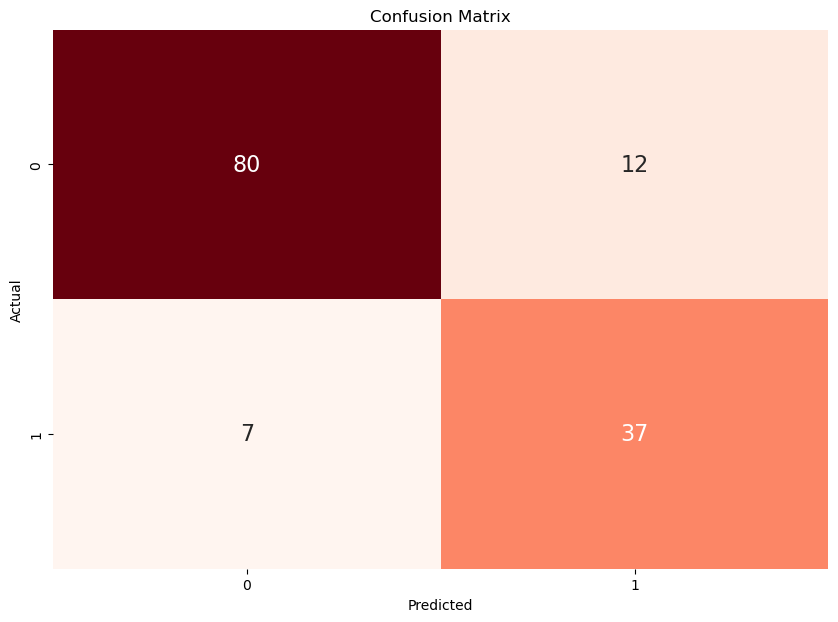

In [35]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Predicting outcomes for new data

In [37]:
new_data = pd.DataFrame({
    " Age (yrs)": [28, 36, 33],
    "Weight (Kg)": [44.6, 65, 68.8],
    "Height(Cm) ": [152, 161.5, 165],
    "BMI": [19.3, 24.9, 25.3],
    "Pulse rate(bpm) ": [78, 74, 72],
    "Cycle(R/I)": [2, 2, 2],
    "Cycle length(days)": [5, 5, 5],
    "Marraige Status (Yrs)": [7, 11, 10],
    "  I   beta-HCG(mIU/mL)": [1.99, 60.8, 494.08],
    "FSH(mIU/mL)": [7.95, 6.73, 5.54],
    "LH(mIU/mL)": [3.68, 1.09, 0.88],
    "FSH/LH": [2.16, 6.17, 6.3],
    "Hip(inch)": [36, 38, 40],
    "Waist(inch)": [30, 32, 36],
    "Waist:Hip Ratio": [0.83, 0.84, 0.9],
    "TSH (mIU/L)": [0.68, 3.16, 2.54],
    "AMH(ng/mL)": [2.07, 1.53, 6.63],
    "PRL(ng/mL)": [45.16, 20.09, 10.52],
    "Vit D3 (ng/mL)": [17.1, 61.3, 49.7],
    "PRG(ng/mL)": [0.57, 0.97, 0.36],
    "RBS(mg/dl)": [92, 92, 84],
    "Weight gain(Y/N)": [0, 0, 0],
    "hair growth(Y/N)": [0, 0, 0],
    "Skin darkening (Y/N)": [0, 0, 0],
    "Fast food (Y/N)": [1, 0, 1],
    "Follicle No. (L)": [3, 3, 13],
    "Follicle No. (R)": [3, 5, 15],
    "Avg. F size (L) (mm)": [18, 15, 18],
    "Avg. F size (R) (mm)": [18, 14, 20],
    "Endometrium (mm)": [8.5, 3.7, 10]
})

In [38]:
predictions_new = xgb.predict(new_data)

In [39]:
for i in range(len(predictions_new)):
    value =  'Positive' if predictions_new[i] == 1 else 'Negative'
    print(f"Person {i+1} has PCOS : {value}")

Person 1 has PCOS : Negative
Person 2 has PCOS : Negative
Person 3 has PCOS : Positive


## Saving the model

In [41]:
current_dir = os.getcwd()

file_path = os.path.join(current_dir, 'PCOS_Model.joblib')

# Save the model to the specified file path
dump(xgb, file_path)

print(f"PCOS_Model saved to {file_path}")

PCOS_Model saved to C:\Users\karth\Documents\PCOS\PCOS_Model.joblib
